In [3]:
!gdown --id  1p51wPttbwArR6GgaLDziFyVX005Pv9ew --output "data.zip"
!unzip -q "data.zip"

Downloading...
From: https://drive.google.com/uc?id=1p51wPttbwArR6GgaLDziFyVX005Pv9ew
To: /content/data.zip
100% 820k/820k [00:00<00:00, 3.83MB/s]


In [4]:
from os import listdir
import imageio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
% matplotlib inline

In [6]:
train_set = [str(i)+"_"+str(j)+".png" for i in range(1, 41) for j in range(1, 10)]
test_set = [str(i)+"_"+str(j)+".png" for i in range(1, 41) for j in range(10, 11)]

train_X = [imageio.imread("p1_data/"+n) for n in train_set]
train_X = np.array(train_X).reshape(360, -1)
train_y = [i for i in range(1, 41) for _ in range(1, 10)]

test_X = [imageio.imread("p1_data/"+n) for n in test_set]
test_X = np.array(test_X).reshape(40, -1)
test_y = [i for i in range(1, 41) for _ in range(10, 11)]

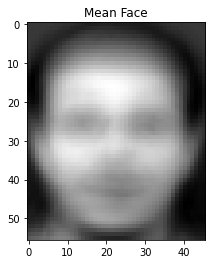

In [8]:
mean_face_vector = train_X.mean(axis=0)
plt.title("Mean Face")
plt.imshow(mean_face_vector.reshape(56, 46), cmap='gray')
plt.show()

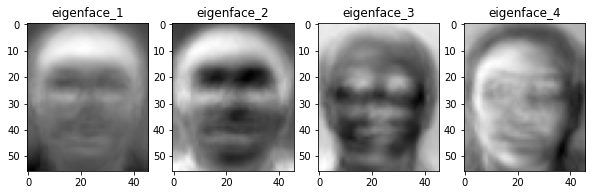

In [13]:
pca = PCA()
output = pca.fit(train_X - mean_face_vector)
output.components_.shape

e1 = (output.components_[0]).reshape(56, 46)
e2 = (output.components_[1]).reshape(56, 46)
e3 = (output.components_[2]).reshape(56, 46)
e4 = (output.components_[3]).reshape(56, 46)

plt.figure(figsize=(10, 6))

plt.subplot(141)
plt.imshow(e1, cmap='gray')
plt.title("eigenface_1")

plt.subplot(142)
plt.imshow(e2, cmap='gray')
plt.title("eigenface_2")

plt.subplot(143)
plt.imshow(e3, cmap='gray')
plt.title("eigenface_3")

plt.subplot(144)
plt.imshow(e4, cmap='gray')
plt.title("eigenface_4")
plt.show()

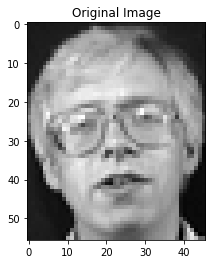

Projected shape :  (1, 360)


In [20]:
input_img = imageio.imread("p1_data/2_1.png").reshape(1, -1)
plt.title("Original Image")
plt.imshow(input_img.reshape(56, 46), cmap="gray")
plt.show()

projected = pca.transform(input_img - mean_face_vector)
print("Projected shape : ", projected.shape)

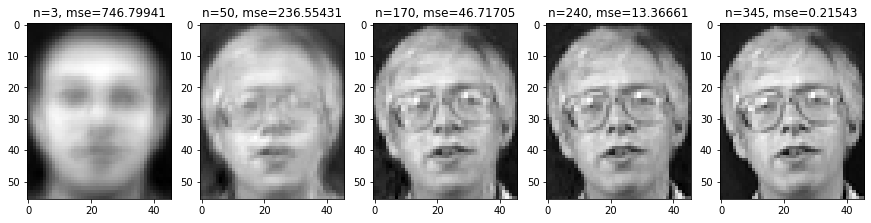

In [21]:
plt.figure(figsize=(15, 6))

for j, i in enumerate([3, 50, 170, 240, 345]):
    recon_f = (projected[:,:i] @ output.components_[:i]) + mean_face_vector
    mse = np.mean((recon_f - input_img) ** 2)
    plt.subplot(1, 5, j+1)
    tit = "n="+str(i)+", mse="+str(np.round(mse, 5))
    plt.title(tit)
    plt.imshow(recon_f.reshape(56, 46), cmap = "gray")
    
plt.show()


In [22]:
train_X_reduced = pca.transform(train_X - mean_face_vector)
knn = KNeighborsClassifier()
param_grid = {"n_neighbors":[1,3,5]}
clf = GridSearchCV(knn, param_grid, cv=3) # conduct 3-fold cross validation
print("         k=1         k=3         k=5")
for n in [3, 50, 170]:
    clf.fit(train_X_reduced[:,:n], train_y)
    print("n= %3d" %n, clf.cv_results_["mean_test_score"])

         k=1         k=3         k=5
n=   3 [0.65       0.61111111 0.56111111]
n=  50 [0.96111111 0.9        0.84722222]
n= 170 [0.95555556 0.88888889 0.82222222]


In [23]:
test_X_reduced = pca.transform(test_X - mean_face_vector)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X_reduced[:, :50], train_y)
pred_y = knn.predict(test_X_reduced[:, :50])

acc = accuracy_score(y_pred=pred_y, y_true=test_y)
print("Acc on testing set:", acc)

Acc on testing set: 0.925
